# Multi-Template-Matching
## Tutorial 1 - Introduction

This tutorial gives an overview of the different ways to use multiple template matching for object recognition.  
More documentation is available in the [wiki](https://github.com/LauLauThom/MultiTemplateMatching/wiki) section of the repository.

## Citations
If you use this implementation for your research, please cite:

Thomas, L.S.V., Gehrig, J.   
*Multi-template matching: a versatile tool for object-localization in microscopy images.*  
BMC Bioinformatics 21, 44 (2020). https://doi.org/10.1186/s12859-020-3363-7

-------------------------

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This tutorial is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
You are free to distribute and/or modify this tutorial, provided you attribute the author:  

Multi-Template Matching python package online - _Tutorial 1: Introduction_  
Laurent Thomas - 2019   
https://github.com/multi-template-matching/MultiTemplateMatching-Python/blob/master/tutorials/Tutorial1-Introduction.ipynb

## Let's code !

In [ ]:
!pip install Multi-Template-Matching

     |████████████████████████████████| 37.6MB 1.1MB/s 


In [ ]:
# 1st import the package and check its version
import MTM
print("MTM version: ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage import io
import matplotlib.pyplot as plt

MTM version:  1.6.1


The main function in MTM is `matchTemplates`.  
Let's have a look at its docstring.

In [ ]:
matchTemplates?

As you can read from the doc, the function have 2 main image arguments :
- a list of template images to search
- an image in which to search for objects using the templates

Let's open some image of coins from scikit-image, we will showcase the multi-template matching for the detection of the coin locations

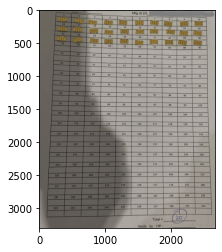

In [ ]:
##Image to search for template
image = io.imread('./1008.jpg')
plt.imshow(image, cmap="gray")

## - crop a template  
We need some template image to search in the image.  
We can simply crop some coins from the image.  
__NB : templates are always rectangular (there are image matrices). And thus the predicted locations are always rectangular too !__

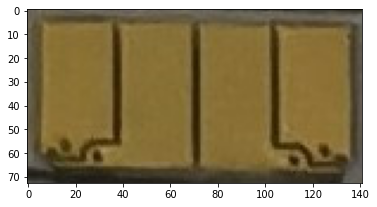

In [ ]:
##Image of template
template = io.imread('./templates/1001-3.jpg')
plt.imshow(template, cmap="gray")

## - Calling matchTemplates with a Multiple templates
We will now use the `matchTemplates` that we have seen above.

In [ ]:
##Create a folder called template and add image of each template (cropped image of printer chip)
import os
path = "/content/templates"

# 1st format the template into a list of tuple (label, templateImage)
listTemplate = []

for filename in os.listdir(path):
  print(filename)
  if(".jpg" in filename):
    template = io.imread(os.path.join('templates', filename))
    listTemplate.append((filename, template))

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, image, score_threshold=0.6, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.1)

1001-3__fliph.jpg
1001-3__rot5.jpg
1001-3__rot10.jpg
1001-3__rot-15.jpg
.ipynb_checkpoints
1001-3__rot15.jpg
1001-3__rot-5.jpg
1001-3.jpg
1001-3__rot-10.jpg
1001-3__flipv.jpg


Here the coins are nicely separated so we do not expect any overlap between the predicted coins locations ie `maxOverlap=0`.  
For the score, we use a normalised cross-correlation `cv2.TM_CCOEFF_NORMED`, which is robust to illumination changes.  
Such score ranges from 0 to 1 and a good score is close to 1. `score_threshold=0.5` is thus usually a safe value.

Let's have a look at `Hits`...

In [ ]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 4 hits


,TemplateName,BBox,Score
12,1001-3.jpg,"(286, 107, 141, 73)",0.995380
14,1001-3__flipv.jpg,"(513, 255, 141, 73)",0.720992
7,1001-3.jpg,"(272, 399, 141, 73)",0.679041
10,1001-3.jpg,"(287, 252, 141, 73)",0.621158


As you can see, `Hits` is a table (pandas DataFrame) with one row per detection with:
- the name of the template that yield the match
- the coordinates of the bounding box (x, y, width, height)
- the score for that detection  

The first hit in the list has a score of 1 and is the coin that is used as template.

## - View the detections
We can then represent the detections as bounding boxes overlaid on the image, with a tag for the label.

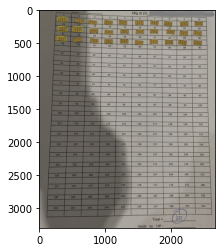

In [ ]:
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay) 